In [ ]:
# prompt: import pandas as pd

import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/sample_data/Train.csv',sep=',', header='infer', engine='python')

In [ ]:
df.head(10)

,ID,text,label
0,IQOTJAT,m3alem bourjilia w illi ma yefehmouch yelzmou ...,1.0
1,HY9M63D,Ya m3alllam,1.0
2,7SV55S2,Ma7lek! Zin ou fannena 7loua.,1.0
3,KDLJVZR,hhhhh ya bliiiiiiiida ya Hanen,0.0
4,0MAU5GY,Nikraha w ma5yebha pffff,0.0
5,EA1VCJ2,3sal denya :*,1.0
6,2SZ11JC,سي جلول يعطيك ألف صحة و ربي يبارك فيك وكأنك شر...,1.0
7,59OI2D8,Ya mama mali masta lasta :p :p,0.0
8,E1TVXKP,Bravo Neji jelloul,1.0
9,L5L4SAC,نسحو يفهم في كل شيء,1.0


In [ ]:
df.label.value_counts()

label
1.0    4366
0.0    3975
Name: count, dtype: int64

<Axes: xlabel='label'>

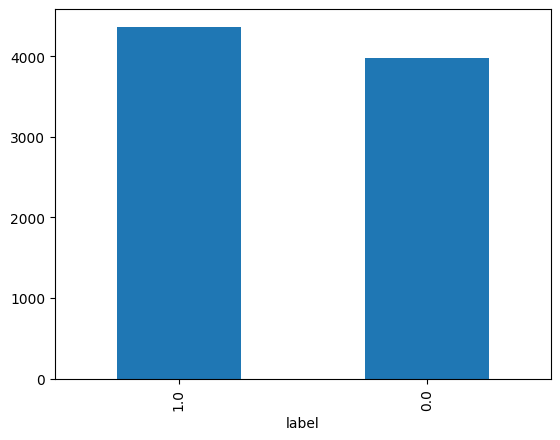

In [ ]:
df.label.value_counts().plot(kind='bar')

In [ ]:
df['text'] = df['text'].str.lower()

In [ ]:
df.head(10)

,ID,text,label
0,IQOTJAT,m3alem bourjilia w illi ma yefehmouch yelzmou ...,1.0
1,HY9M63D,ya m3alllam,1.0
2,7SV55S2,ma7lek! zin ou fannena 7loua.,1.0
3,KDLJVZR,hhhhh ya bliiiiiiiida ya hanen,0.0
4,0MAU5GY,nikraha w ma5yebha pffff,0.0
5,EA1VCJ2,3sal denya :*,1.0
6,2SZ11JC,سي جلول يعطيك ألف صحة و ربي يبارك فيك وكأنك شر...,1.0
7,59OI2D8,ya mama mali masta lasta :p :p,0.0
8,E1TVXKP,bravo neji jelloul,1.0
9,L5L4SAC,نسحو يفهم في كل شيء,1.0


In [ ]:
df.isna( ).sum()

ID        50
text       6
label    121
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isna( ).sum()

ID       0
text     0
label    0
dtype: int64

In [ ]:
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 1]))

In [ ]:
df.head(15)

,ID,text,label
0,IQOTJAT,m3alem bourjilia illi ma yefehmouch yelzmou ya...,1.0
1,HY9M63D,ya m3alllam,1.0
2,7SV55S2,ma7lek! zin ou fannena 7loua.,1.0
3,KDLJVZR,hhhhh ya bliiiiiiiida ya hanen,0.0
4,0MAU5GY,nikraha ma5yebha pffff,0.0
5,EA1VCJ2,3sal denya :*,1.0
6,2SZ11JC,سي جلول يعطيك ألف صحة ربي يبارك فيك وكأنك شرهة...,1.0
7,59OI2D8,ya mama mali masta lasta :p :p,0.0
8,E1TVXKP,bravo neji jelloul,1.0
9,L5L4SAC,نسحو يفهم في كل شيء,1.0


In [ ]:
character_special = ['[', ']', '(', ')', '.', '+', '=', '.', ';', ',', '/', '|', '!', '%', '<', '>', '{', '}', '@', '#', '_', '-',':', '*']

In [ ]:
for char in character_special:
  df['text'] = df['text'].str.replace(char,  '')

In [ ]:
df.head(15)

,ID,text,label
0,IQOTJAT,m3alem bourjilia illi ma yefehmouch yelzmou ya...,1.0
1,HY9M63D,ya m3alllam,1.0
2,7SV55S2,ma7lek zin ou fannena 7loua,1.0
3,KDLJVZR,hhhhh ya bliiiiiiiida ya hanen,0.0
4,0MAU5GY,nikraha ma5yebha pffff,0.0
5,EA1VCJ2,3sal denya,1.0
6,2SZ11JC,سي جلول يعطيك ألف صحة ربي يبارك فيك وكأنك شرهة...,1.0
7,59OI2D8,ya mama mali masta lasta p p,0.0
8,E1TVXKP,bravo neji jelloul,1.0
9,L5L4SAC,نسحو يفهم في كل شيء,1.0


In [ ]:
import re
def remove_reported_chard(text):
  return re.sub(r'(.)\1+', r'\1', text)

df['text'] = df['text'].apply(remove_reported_chard)

In [ ]:
df.head(15)

,ID,text,label
0,IQOTJAT,m3alem bourjilia ili ma yefehmouch yelzmou ya9...,1.0
1,HY9M63D,ya m3alam,1.0
2,7SV55S2,ma7lek zin ou fanena 7loua,1.0
3,KDLJVZR,h ya blida ya hanen,0.0
4,0MAU5GY,nikraha ma5yebha pf,0.0
5,EA1VCJ2,3sal denya,1.0
6,2SZ11JC,سي جلول يعطيك ألف صحة ربي يبارك فيك وكأنك شرهة...,1.0
7,59OI2D8,ya mama mali masta lasta p p,0.0
8,E1TVXKP,bravo neji jeloul,1.0
9,L5L4SAC,نسحو يفهم في كل شيء,1.0


In [ ]:
number_mapping = {
    '2': 'a',
    '3': 'aa',
    '4': 'gh',
    '5': 'kh',
    '7': 'h',
    '9': 'k'
}

In [ ]:
def repalce_number(text):
  words = text.split()
  for k, word in enumerate(words):
    for num, char in number_mapping.items():
      if num in word:
        words[k] = word.replace(num, char)
  return ' '.join(words)


df['text'] = df['text'].apply(repalce_number)

In [ ]:
df.head(15)

,ID,text,label
0,IQOTJAT,maaalem bourjilia ili ma yefehmouch yelzmou ya...,1.0
1,HY9M63D,ya maaalam,1.0
2,7SV55S2,mahlek zin ou fanena hloua,1.0
3,KDLJVZR,h ya blida ya hanen,0.0
4,0MAU5GY,nikraha makhyebha pf,0.0
5,EA1VCJ2,aasal denya,1.0
6,2SZ11JC,سي جلول يعطيك ألف صحة ربي يبارك فيك وكأنك شرهة...,1.0
7,59OI2D8,ya mama mali masta lasta p p,0.0
8,E1TVXKP,bravo neji jeloul,1.0
9,L5L4SAC,نسحو يفهم في كل شيء,1.0


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
french_stopwords = set(stopwords.words('french'))

# Function to remove French stop words
def remove_stopwords(text):
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stop words
    filtered_words = [word for word in words if word.lower() not in french_stopwords]
    # Join the filtered words back into a single string
    return ' '.join(filtered_words)

# Apply the remove_stopwords function to the 'text' column
df['text'] = df['text'].apply(remove_stopwords)


In [ ]:
df.head(20)

,ID,text,label
0,IQOTJAT,maaalem bourjilia ili yefehmouch yelzmou yakra...,1.0
1,HY9M63D,ya maaalam,1.0
2,7SV55S2,mahlek zin fanena hloua,1.0
3,KDLJVZR,h ya blida ya hanen,0.0
4,0MAU5GY,nikraha makhyebha pf,0.0
5,EA1VCJ2,aasal denya,1.0
6,2SZ11JC,سي جلول يعطيك ألف صحة ربي يبارك فيك وكأنك شرهة...,1.0
7,59OI2D8,ya mama mali masta lasta p p,0.0
8,E1TVXKP,bravo neji jeloul,1.0
9,L5L4SAC,نسحو يفهم في كل شيء,1.0


In [ ]:
arabic_stopwords = set(stopwords.words('arabic'))

In [ ]:
arabic_stopwords

{'ء',
 'ءَ',
 'آ',
 'آب',
 'آذار',
 'آض',
 'آمينَ',
 'آناء',
 'آنفا',
 'آه',
 'آها',
 'آهاً',
 'آهٍ',
 'آهِ',
 'آي',
 'أ',
 'أبدا',
 'أبريل',
 'أبو',
 'أبٌ',
 'أجل',
 'أجمع',
 'أحد',
 'أخبر',
 'أخذ',
 'أخو',
 'أخٌ',
 'أربع',
 'أربعاء',
 'أربعة',
 'أربعمئة',
 'أربعمائة',
 'أرى',
 'أسكن',
 'أصبح',
 'أصلا',
 'أضحى',
 'أطعم',
 'أعطى',
 'أعلم',
 'أغسطس',
 'أف',
 'أفريل',
 'أفعل به',
 'أفٍّ',
 'أقبل',
 'أقل',
 'أكتوبر',
 'أكثر',
 'أل',
 'ألا',
 'ألف',
 'ألفى',
 'أم',
 'أما',
 'أمام',
 'أمامك',
 'أمامكَ',
 'أمد',
 'أمس',
 'أمسى',
 'أمّا',
 'أن',
 'أنا',
 'أنبأ',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'أنتِ',
 'أنشأ',
 'أنى',
 'أنًّ',
 'أنّى',
 'أهلا',
 'أو',
 'أوت',
 'أوشك',
 'أول',
 'أولئك',
 'أولاء',
 'أولالك',
 'أوه',
 'أوّهْ',
 'أى',
 'أي',
 'أيا',
 'أيار',
 'أيضا',
 'أيلول',
 'أين',
 'أينما',
 'أيها',
 'أيّ',
 'أيّان',
 'أُفٍّ',
 'ؤ',
 'إحدى',
 'إذ',
 'إذا',
 'إذاً',
 'إذما',
 'إذن',
 'إزاء',
 'إلا',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'إليكنّ',
 'إليكَ',
 'إلَيْكَ',
 'إلّا',


In [ ]:
def remove_stopwords(text):
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stop words
    filtered_words = [word for word in words if word not in arabic_stopwords]
    # Join the filtered words back into a single string
    return ' '.join(filtered_words)

# Apply the remove_stopwords function to the 'text' column
df['text'] = df['text'].apply(remove_stopwords)

In [ ]:
df.head(20)

,ID,text,label
0,IQOTJAT,maaalem bourjilia ili yefehmouch yelzmou yakra...,1.0
1,HY9M63D,ya maaalam,1.0
2,7SV55S2,mahlek zin fanena hloua,1.0
3,KDLJVZR,h ya blida ya hanen,0.0
4,0MAU5GY,nikraha makhyebha pf,0.0
5,EA1VCJ2,aasal denya,1.0
6,2SZ11JC,سي جلول يعطيك صحة ربي يبارك فيك وكأنك شرهة شبا...,1.0
7,59OI2D8,ya mama mali masta lasta p p,0.0
8,E1TVXKP,bravo neji jeloul,1.0
9,L5L4SAC,نسحو يفهم شيء,1.0


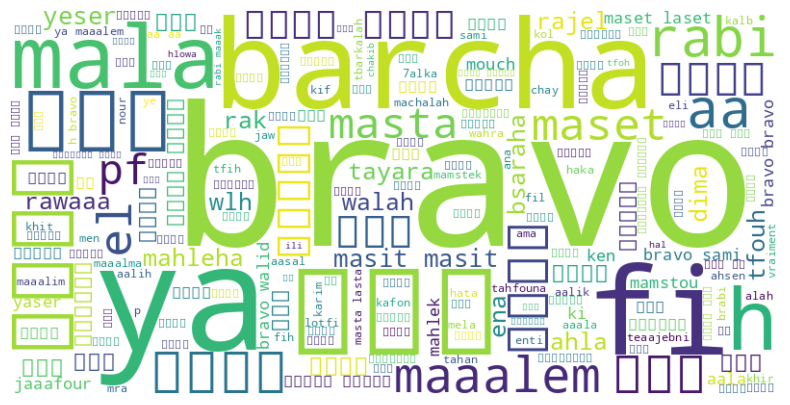

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text into a single string
text = ' '.join(df['text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def count_word_occurences(word, text_series, class_series, target_class):
  word_count = 0
  for text, label in zip(text_series, class_series):
    if label == target_class:
      if word in text.split():
        word_count += 1
  return word_count

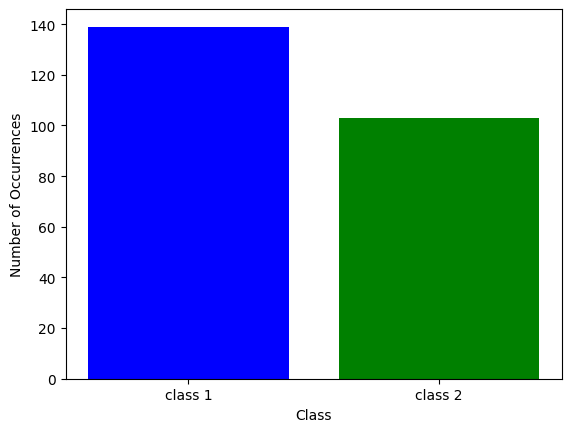

In [ ]:
word_to_search = 'barcha'

occurences_class_1 = count_word_occurences(word_to_search, df['text'], df['label'], target_class = 1)
occurences_class_2 = count_word_occurences(word_to_search, df['text'], df['label'], target_class = 0)

plt.bar(['class 1', 'class 2'], [occurences_class_1, occurences_class_2], color= ['blue', 'green'])
plt.xlabel('Class')
plt.ylabel('Number of Occurrences')
plt.show()

In [ ]:
df['text'] = df['text'].str.replace('barcha', '')
df['text'] = df['text'].str.replace('ya', '')
df['text'] = df['text'].str.replace('fi', '')
df['text'] = df['text'].str.replace('تونس', '')


In [ ]:
from collections import Counter

text_combined = ' '.join(df['text'])
words = text_combined.lower().split()

word_counts = Counter(words)

sorted_words_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

sorted_words_counts[:30]

[('bravo', 1107),
 ('اله', 482),
 ('ماسط', 392),
 ('الي', 352),
 ('ربي', 323),
 ('برافو', 310),
 ('h', 305),
 ('maset', 304),
 ('mala', 269),
 ('aa', 257),
 ('maaalem', 255),
 ('معلم', 234),
 ('rabi', 227),
 ('واله', 203),
 ('masta', 182),
 ('masit', 174),
 ('برشا', 173),
 ('el', 172),
 ('راك', 152),
 ('ملا', 148),
 ('rak', 143),
 ('``', 142),
 ('انت', 135),
 ('tfouh', 135),
 ('راجل', 130),
 ('pf', 127),
 ('dima', 127),
 ('موش', 125),
 ('ياسر', 124),
 ('aalik', 124)]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['text'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())


In [ ]:
tfidf_df.head(10)

,0a0,10,1016,10rajel,18,1gh,1k,1kh,201gh,2hla,...,ﻭﻩ,ﻳﺎ,ﻳﺘﻔﺮﺝ,ﻳﻄﻮﻝ,ﻳﻌﻄﻴﻬﺎ,ﻹنحطاط,ﻻجئ,ﻻسط,ﻻن,ﻻيتناسب
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tfidf_df['label'] = df['label']

In [ ]:
X = tfidf_df.drop('label', axis=1)
y = df['label']

In [ ]:
tfidf_df.head(10)

,0a0,10,1016,10rajel,18,1gh,1k,1kh,201gh,2hla,...,ﻳﺎ,ﻳﺘﻔﺮﺝ,ﻳﻄﻮﻝ,ﻳﻌﻄﻴﻬﺎ,ﻹنحطاط,ﻻجئ,ﻻسط,ﻻن,ﻻيتناسب,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, len(y_train), X_test.shape, len(y_test )

((6669, 21233), 6669, (1668, 21233), 1668)

In [ ]:
tfidf_df.isna().sum()

0a0          0
10           0
1016         0
10rajel      0
18           0
          ... 
ﻻجئ          0
ﻻسط          0
ﻻن           0
ﻻيتناسب      0
label      125
Length: 21234, dtype: int64

In [ ]:
tfidf_df.dropna()

,0a0,10,1016,10rajel,18,1gh,1k,1kh,201gh,2hla,...,ﻳﺎ,ﻳﺘﻔﺮﺝ,ﻳﻄﻮﻝ,ﻳﻌﻄﻴﻬﺎ,ﻹنحطاط,ﻻجئ,ﻻسط,ﻻن,ﻻيتناسب,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
prediction = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, prediction)

0.829136690647482